# Data Scientist Professional Case Study

### Company Background

You have been hired as a data scientist at Discount Motors, a used car dealership in the UK. The dealership is expanding and has hired a large number of junior salespeople. Although promising, these junior employees have difficulties pricing used cars that arrive at the dealership. Sales have declined 18% in recent months.

The sales team have reached out to the data science team to get help with this problem.


### Customer Question

The sales team wants to know:
- Can you predict the price that a used car should be listed at based on features of the car?



### Success Criteria

It is known that cars that are more than £1500 from the estimated price will not sell. The sales team wants to know whether you can make predictions within this range.


### Dataset

The data you will use for this analysis can be accessed here: `"data/toyota.csv"`

In [1]:
# Use this cell to begin, and add as many cells as you need to complete your analysis!

# Importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

Once we imported our data , now we can perform an Exploratory Data Analysis.

In [2]:
# Reading the dataset
raw_data = pd.read_csv("data/toyota.csv")
display(raw_data.head())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [3]:
data_info = raw_data.info()
display(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


None

As we can see, there is no missing values in our dataset.

In [4]:
display(raw_data.describe())

,year,price,mileage,tax,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,94.697240,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,73.880776,15.836710,0.436159
min,1998.000000,850.000000,2.000000,0.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,0.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,135.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,145.000000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,565.000000,235.000000,4.500000


Judging by the figures there is a visible difference between mean and median in price, mileage and tax column. Therefore, we can take a closer look at distribution of these variables.

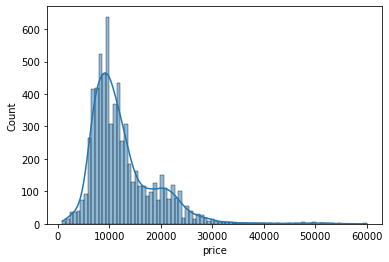

In [5]:
sns.histplot(x="price", data = raw_data, kde=True)
plt.show()

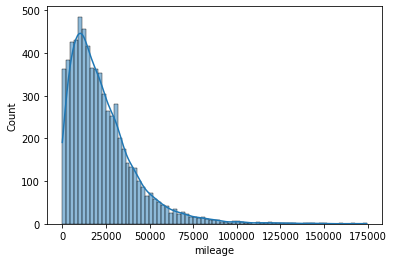

In [6]:
sns.histplot(x="mileage", data = raw_data, kde=True)
plt.show()

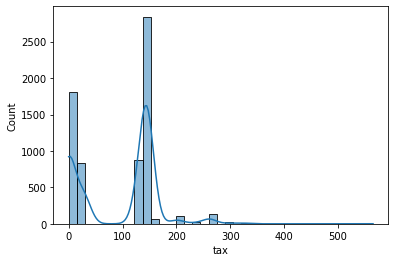

In [7]:
sns.histplot(x="tax", data = raw_data, kde=True)
plt.show()

As we can see neither of those variables follow normal distribution.
The price distribution have two common values 10000 GBP and 20000 GBP.
When it comes to mileage distribution, we can see that it is right-skewed distribution. Hence, the mean is greater that 50th percentile.
The tax distribution is quite different. We can see that there are some gaps in tax values.

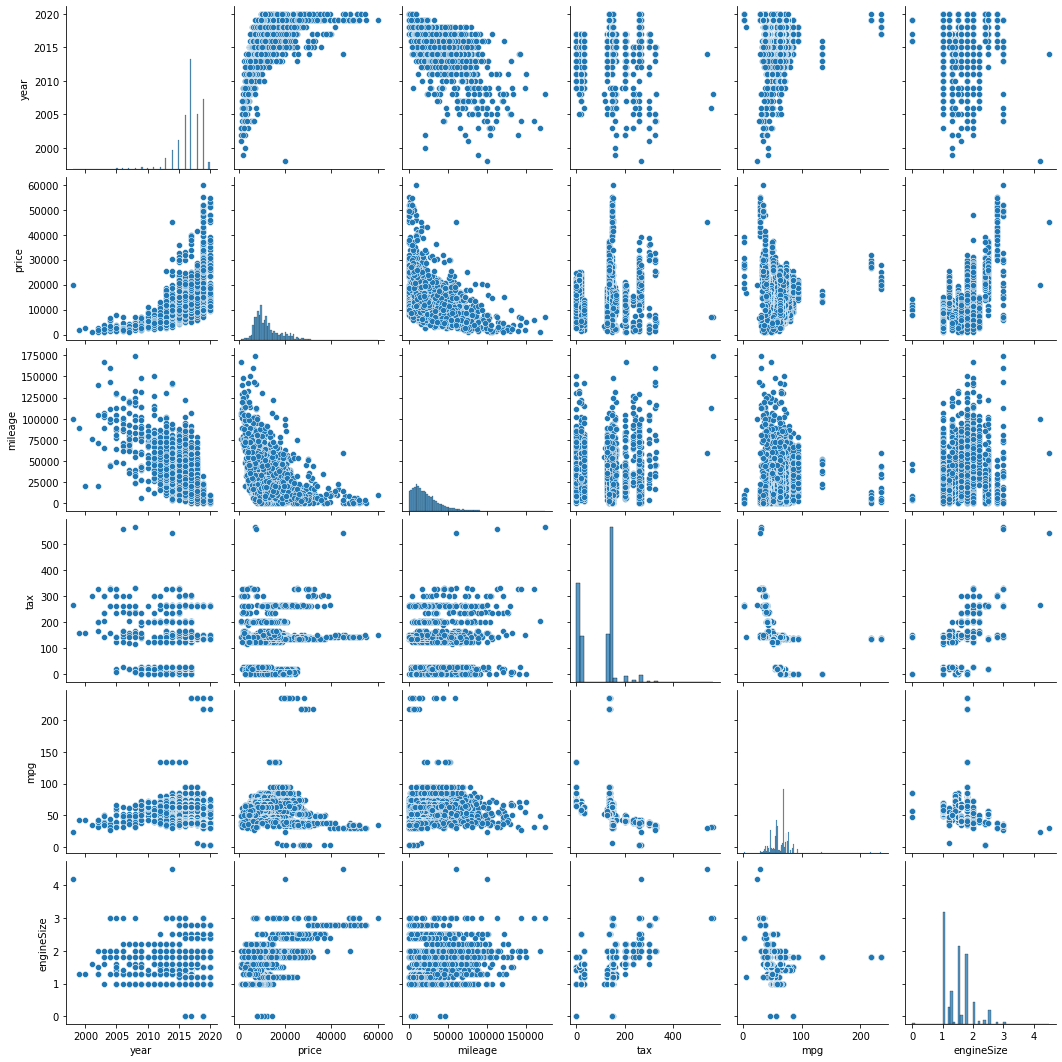

In [8]:
sns.pairplot(raw_data)
plt.show()

Judging by the scatterplot of year vs price, younger cars tend to have a higher price.

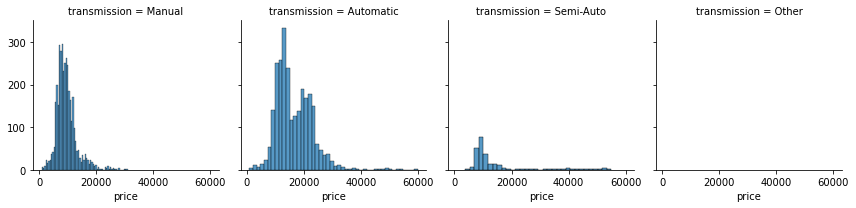

In [9]:
g = sns.FacetGrid(raw_data, col = "transmission")
g.map(sns.histplot, "price")

We can conclude from our data that Automatic cars tend to cost more that Manual cars.

Now we have to One Hot Encode our data

In [10]:
data = pd.get_dummies(raw_data)

print(data.columns)

Index(['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Auris',
       'model_ Avensis', 'model_ Aygo', 'model_ C-HR', 'model_ Camry',
       'model_ Corolla', 'model_ GT86', 'model_ Hilux', 'model_ IQ',
       'model_ Land Cruiser', 'model_ PROACE VERSO', 'model_ Prius',
       'model_ RAV4', 'model_ Supra', 'model_ Urban Cruiser', 'model_ Verso',
       'model_ Verso-S', 'model_ Yaris', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Diesel', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol'],
      dtype='object')


In [11]:
x_col_names = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Auris',
       'model_ Avensis', 'model_ Aygo', 'model_ C-HR', 'model_ Camry',
       'model_ Corolla', 'model_ GT86', 'model_ Hilux', 'model_ IQ',
       'model_ Land Cruiser', 'model_ PROACE VERSO', 'model_ Prius',
       'model_ RAV4', 'model_ Supra', 'model_ Urban Cruiser', 'model_ Verso',
       'model_ Verso-S', 'model_ Yaris', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Other', 'transmission_Semi-Auto',
       'fuelType_Diesel', 'fuelType_Hybrid', 'fuelType_Other',
       'fuelType_Petrol']


y_col_names = ['price']

Once we have encoded our data and separate features from target, now are able to split our data into training and testing sets.

In [12]:
X = data[x_col_names]
y = data[y_col_names]

In [13]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

Now in order to compare different regression models we have to normalize our data first.

In [14]:
from sklearn.preprocessing import Normalizer


scaler = Normalizer()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Now we can find the best model using cross validation method.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import cross_val_score


models = {
    "Linear Regression" : LinearRegression(),
    "Decision Tree Regressor" : DecisionTreeRegressor(),
    "Bayesian Ridge" : BayesianRidge(),
    "Gradient Boosting Regressor" : GradientBoostingRegressor(),
    "Elastic Net" : ElasticNet()
}

scores = {}

for name, model in models.items():
    s = cross_val_score(model, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
    scores[name] = np.mean(-s)
    

In [16]:
scores = pd.DataFrame(data = scores.values(), index = scores.keys(), columns = ["MSE"])
scores["RMSE"] = scores["MSE"].apply(np.sqrt)
display(scores)

,MSE,RMSE
Linear Regression,6.826213e+07,8262.089680
Decision Tree Regressor,4.982619e+06,2232.178110
Bayesian Ridge,1.602624e+07,4003.278197
Gradient Boosting Regressor,3.467697e+06,1862.175303
Elastic Net,3.933841e+07,6272.034273


We can see that Gradient Boosting Regressor has the smallest Root Mean Squared Error value.

In [17]:
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.9258806478389539


In order to improve our model to predict better results we will use Grid Search Cross Validation to find the best parameters for our model.

In [19]:
from sklearn.model_selection import GridSearchCV, KFold


kf = KFold(n_splits = 5)

model = GradientBoostingRegressor()

params = {
    "learning_rate" : [0.1, 0.2, 0.3],
    "n_estimators" : [300, 400],
    "max_depth" : [3, 4, 5]
}

grid_search_cv = GridSearchCV(model, params, cv=kf, scoring="explained_variance")

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 5], 'n_estimators': [300, 400]},
             scoring='explained_variance')

In [20]:
grid_search_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 400}

In [21]:
best_model = grid_search_cv.best_estimator_

In [22]:
y_pred = best_model.predict(X_test)

print(r2_score(y_test, y_pred))

0.9342331854664712


In [23]:
prices_cmp = np.concatenate((y_test.values.reshape(-1, 1), y_pred.reshape(-1, 1)), axis = 1)

In [24]:
prices_cmp = pd.DataFrame(data = prices_cmp, columns = ["Price", "Predicted Price"])

In [25]:
prices_cmp["Difference"] = prices_cmp["Price"] - prices_cmp["Predicted Price"]

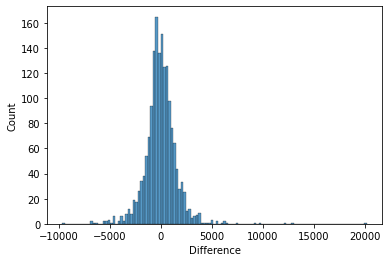

In [26]:
sns.histplot(x = "Difference", data = prices_cmp)
plt.show()

In [27]:
display(prices_cmp.head())

,Price,Predicted Price,Difference
0,11000.0,10427.581284,572.418716
1,13999.0,14333.718670,-334.718670
2,7298.0,7908.608136,-610.608136
3,12690.0,11928.927814,761.072186
4,9490.0,9810.291230,-320.291230


Created model should increase the sales in the company by predicting prices of cars that are fairly close to actual prices.
In comparison to the business criteria in large part the model returns an appropriate results (the predicted price is not greater than 1500 GBP + Actual Price). For future work, I would recommend to perform feature selection and feature extraction to improve the model. Also it might be a good practise to collect different type of feature that might be more correlated with the price.